In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df = pd.read_csv("states_all.csv")
df

PRIMARY_KEY           STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0            1992_ALABAMA         ALABAMA  1992     NaN      2678885.0   
1             1992_ALASKA          ALASKA  1992     NaN      1049591.0   
2            1992_ARIZONA         ARIZONA  1992     NaN      3258079.0   
3           1992_ARKANSAS        ARKANSAS  1992     NaN      1711959.0   
4         1992_CALIFORNIA      CALIFORNIA  1992     NaN     26260025.0   
...                   ...             ...   ...     ...            ...   
1913    2017_NORTH_DAKOTA    NORTH_DAKOTA  2017     NaN            NaN   
1914    2017_RHODE_ISLAND    RHODE_ISLAND  2017     NaN            NaN   
1915  2017_SOUTH_CAROLINA  SOUTH_CAROLINA  2017     NaN            NaN   
1916    2017_SOUTH_DAKOTA    SOUTH_DAKOTA  2017     NaN            NaN   
1917   2017_WEST_VIRGINIA   WEST_VIRGINIA  2017     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          2653798.0   
1            106780.0       720711.0       222100.0           972488.0   
2            297888.0      1369815.0      1590376.0          3401580.0   
3            178571.0       958785.0       574603.0          1743022.0   
4           2072470.0     16546514.0      7641041.0         27138832.0   
...               ...            ...            ...                ...   
1913              NaN            NaN            NaN                NaN   
1914              NaN            NaN            NaN                NaN   
1915              NaN            NaN            NaN                NaN   
1916              NaN            NaN            NaN                NaN   
1917              NaN            NaN            NaN                NaN   

      INSTRUCTION_EXPENDITURE  ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  \
0                   1481703.0  ...     57948.0     58025.0      41167.0   
1                    498362.0  ...      9748.0      8789.0       6714.0   
2                   1435908.0  ...     55433.0     49081.0      37410.0   
3                    964323.0  ...     34632.0     36011.0      27651.0   
4                  14358922.0  ...    418418.0    363296.0     270675.0   
...                       ...  ...         ...         ...          ...   
1913                      NaN  ...         NaN         NaN          NaN   
1914                      NaN  ...         NaN         NaN          NaN   
1915                      NaN  ...         NaN         NaN          NaN   
1916                      NaN  ...         NaN         NaN          NaN   
1917                      NaN  ...         NaN         NaN          NaN   

      GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
0              NaN            NaN      731634.0        208.327876   
1              NaN            NaN      122487.0               NaN   
2              NaN            NaN      673477.0        215.253932   
3              NaN            NaN      441490.0        210.206028   
4              NaN            NaN     5254844.0        208.398961   
...            ...            ...           ...               ...   
1913           NaN            NaN           NaN        244.243515   
1914           NaN            NaN           NaN        237.554934   
1915           NaN            NaN           NaN        234.043993   
1916           NaN            NaN           NaN        241.588947   
1917           NaN            NaN           NaN        236.057019   

      AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0           252.187522           207.963517                  NaN  
1                  NaN                  NaN           258.859712  
2           265.366278           206.212716           262.169895  
3           256.312090           208.634458           264.619665  
4           260.892247           196.764414                  NaN  
...                ...                  ...                  ...  
1913        288.172322           221.

In [210]:
df.isnull().sum()*100/df.shape[0]


PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          36.183525
TOTAL_REVENUE                   33.524505
FEDERAL_REVENUE                 33.524505
STATE_REVENUE                   33.524505
LOCAL_REVENUE                   33.524505
TOTAL_EXPENDITURE               33.524505
INSTRUCTION_EXPENDITURE         33.524505
SUPPORT_SERVICES_EXPENDITURE    33.524505
OTHER_EXPENDITURE               36.183525
CAPITAL_OUTLAY_EXPENDITURE      33.524505
GRADES_PK_G                     19.603754
GRADES_KG_G                     14.911366
GRADES_4_G                      14.911366
GRADES_8_G                      14.911366
GRADES_12_G                     14.911366
GRADES_1_8_G                    46.819604
GRADES_9_12_G                   44.160584
GRADES_ALL_G                    14.911366
AVG_MATH_4_SCORE                72.106361
AVG_MATH_8_SCORE                72.314911
AVG_READING_4_SCORE             72

In [211]:

fill_list= list()

for x in df:
    if(df[x].isnull().sum()*100/df.shape[0] <50):
        print(x,": Worth")
        fill_list.append(x)
    else:
        print(x,": Not Worth")
        
fill_list.remove("PRIMARY_KEY")
fill_list.remove("STATE")
        

PRIMARY_KEY : Worth
STATE : Worth
YEAR : Worth
ENROLL : Worth
TOTAL_REVENUE : Worth
FEDERAL_REVENUE : Worth
STATE_REVENUE : Worth
LOCAL_REVENUE : Worth
TOTAL_EXPENDITURE : Worth
INSTRUCTION_EXPENDITURE : Worth
SUPPORT_SERVICES_EXPENDITURE : Worth
OTHER_EXPENDITURE : Worth
CAPITAL_OUTLAY_EXPENDITURE : Worth
GRADES_PK_G : Worth
GRADES_KG_G : Worth
GRADES_4_G : Worth
GRADES_8_G : Worth
GRADES_12_G : Worth
GRADES_1_8_G : Worth
GRADES_9_12_G : Worth
GRADES_ALL_G : Worth
AVG_MATH_4_SCORE : Not Worth
AVG_MATH_8_SCORE : Not Worth
AVG_READING_4_SCORE : Not Worth
AVG_READING_8_SCORE : Not Worth


In [224]:
years = df["YEAR"].unique()

for col in fill_list:
    for year in years:
        flag = (df.YEAR == year)
        
        df.loc[flag,col] = df.loc[flag,col].fillna(df[flag][col].mean())

In [225]:
df.isnull().sum()*100/df.shape[0]


PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          22.419187
TOTAL_REVENUE                   19.186653
FEDERAL_REVENUE                 19.186653
STATE_REVENUE                   19.186653
LOCAL_REVENUE                   19.186653
TOTAL_EXPENDITURE               19.186653
INSTRUCTION_EXPENDITURE         19.186653
SUPPORT_SERVICES_EXPENDITURE    19.186653
OTHER_EXPENDITURE               22.419187
CAPITAL_OUTLAY_EXPENDITURE      19.186653
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                    35.349322
GRADES_9_12_G                   32.116788
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                72.106361
AVG_MATH_8_SCORE                72.314911
AVG_READING_4_SCORE             72

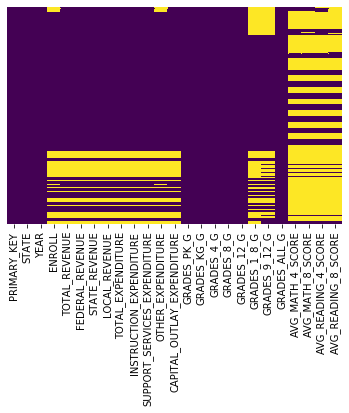

In [228]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [229]:
for col in fill_list:
    df.loc[:, col].interpolate(inplace=True)

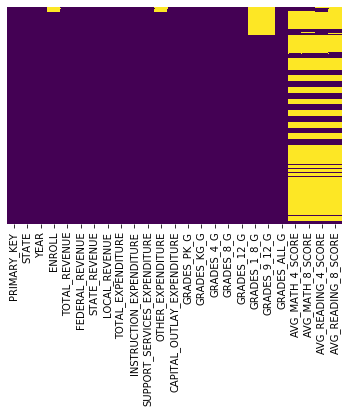

In [230]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()



In [240]:
df.to_csv("states_cleared_all")